# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies

import random
from citipy import citipy

    #API
import requests  #enable making web requests to access and use RESTful API endpoints 
from config import (weather_api_key, g_key)  #Open weather and Google Maps and Places API keys
import json

    #Data manipulation
import numpy as np  #provides fast mathematical computation on arrays and matrices
import pandas as pd  #open source library provides high-performance, easy-to-use data structures and data analysis tools.

    #Data visualisation   
import gmaps  #Embed google maps
from scipy.stats import linregress  #collection of mathematical algorithms and convenience functions - adds significant power to the interactive Python session - manipulating and visualizing data.
from matplotlib import pyplot as plt  #Plotting library
#For linear regression
import scipy.stats as st

#gmaps.configure(api_key=g_key)

## Generate Cities List

In [2]:
#create a latitude range of 600 items  - random numbers from -90 to +90 - need 2 decimal places
#create a longitude range of 600 items - random numbers from -180 to 180 - need 2 decimal places
    #https://pynative.com/python-get-random-float-numbers/

LatList = []
LongList = []
for lat in range(0,1500):
    LatList.append(round(random.uniform(-90, 90), 2))   
    LongList.append(round(random.uniform(-180, 180), 2))


#lat = np.random.uniform(low=-90.000, high=90.000, 600)
#Long = np.random.uniform(low=-180.000, high=180.000, 600)


#Test data
#print(LatList, LongList)
#print(LatList[0], LongList[0])
#print(len(LatList), len(LongList))


In [3]:
#Coords = zip(LatList, LongList)
#Coords


In [4]:
#I think in need to do a dataframe with the two lists
coords = pd.DataFrame(list(zip(LatList, LongList)), 
              columns =['Latitiude', 'Longitude'])
coords.head(2)

,Latitiude,Longitude
0,23.65,-27.07
1,32.64,-56.34


In [5]:
#Test Data
#city1 = citipy.nearest_city (50.58, -162.63)
#print(city1.city_name)

#city2 = citipy.nearest_city (40.46, 72.85)
#print(city2.city_name)

In [6]:
#Test Data
#citytest = citipy.nearest_city (LatList[0], LongList[0])
#print(citytest.city_name)

#citytest2 = citipy.nearest_city (LatList[1], LongList[1])
#print(citytest2.city_name)

In [7]:
#Test Data
#cityzip = citipy.nearest_city(coords["Latitiude"][0], coords["Longitude"][0])
#print(cityzip.city_name)

#cityzip2 = citipy.nearest_city(coords["Latitiude"][1], coords["Longitude"][1])
#print(cityzip2.city_name)

In [8]:
#Create a new City column in coords

coords['City'] = "" 

coords.head(2)

,Latitiude,Longitude,City
0,23.65,-27.07,
1,32.64,-56.34,


In [9]:
#create an empty city list
cities = []

#How to use citipy to get city name
    #https://github.com/wingchen/citipy
        #https://pydoc.net/citipy/0.0.5/citipy.citipy/
        #https://github.com/wingchen/citipy/blob/master/citipy/citipy.py
            #city = citipy.nearest_city(22.99, 120.21)
            #city.city_name

for x in range(0,len(coords)):
    #print(coords["Latitiude"][x], coords["Longitude"][x])
    cityget = citipy.nearest_city(coords["Latitiude"][x], coords["Longitude"][x])
    cityname = cityget.city_name
    
    cities.append(cityname)
    
coords['City'] = cities
coords

,Latitiude,Longitude,City
0,23.65,-27.07,ponta do sol
1,32.64,-56.34,saint george
2,85.35,155.08,chokurdakh
3,-29.18,60.31,saint-philippe
4,33.34,-172.68,kapaa
...,...,...,...
1495,-30.89,-72.74,ovalle
1496,-57.78,-5.55,cape town
1497,-40.98,31.06,port alfred
1498,83.63,-95.65,qaanaaq


In [10]:
#removed duplicates
# Getting the duplicate cities
    #https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/#:~:text=To%20find%20%26%20select%20the%20duplicate,argument%20is%20'first').
coordsduplicates = coords[coords.duplicated(['City'])]
coordsduplicates

,Latitiude,Longitude,City
15,-34.12,-108.62,rikitea
17,-33.02,59.51,saint-philippe
18,20.11,178.89,butaritari
31,16.06,171.43,butaritari
35,34.64,-161.82,kapaa
...,...,...,...
1492,-1.21,-121.52,atuona
1493,-65.77,127.35,new norfolk
1496,-57.78,-5.55,cape town
1497,-40.98,31.06,port alfred


In [11]:
# First create a list of the indexes that are duplicates
duplicateindex = coordsduplicates.index
print(duplicateindex)
len(duplicateindex)

Int64Index([  15,   17,   18,   31,   35,   49,   52,   53,   74,   76,
            ...
            1485, 1486, 1487, 1488, 1489, 1492, 1493, 1496, 1497, 1498],
           dtype='int64', length=855)


855

In [12]:
#Drop the duplicate IDs
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
coordsunique = coords.drop(coords.index[[duplicateindex]])

print(len(coordsunique))
coordsunique.head(30)

645


,Latitiude,Longitude,City
0,23.65,-27.07,ponta do sol
1,32.64,-56.34,saint george
2,85.35,155.08,chokurdakh
3,-29.18,60.31,saint-philippe
4,33.34,-172.68,kapaa
5,63.24,-143.89,fairbanks
6,71.28,-132.96,tuktoyaktuk
7,44.72,160.74,severo-kurilsk
8,1.06,122.85,gorontalo
9,-43.45,-53.41,mar del plata


In [13]:
#Missing indexes - reset index
coordsunique.index=range(0,len(coordsunique))
print(len(coordsunique))
coordsunique.head(30)

645


,Latitiude,Longitude,City
0,23.65,-27.07,ponta do sol
1,32.64,-56.34,saint george
2,85.35,155.08,chokurdakh
3,-29.18,60.31,saint-philippe
4,33.34,-172.68,kapaa
5,63.24,-143.89,fairbanks
6,71.28,-132.96,tuktoyaktuk
7,44.72,160.74,severo-kurilsk
8,1.06,122.85,gorontalo
9,-43.45,-53.41,mar del plata


In [14]:
#create an empty city list
#cities = []
#duplicates = []

#How to use citipy to get city name
    #https://github.com/wingchen/citipy
        #https://pydoc.net/citipy/0.0.5/citipy.citipy/
        #https://github.com/wingchen/citipy/blob/master/citipy/citipy.py
            #city = citipy.nearest_city(22.99, 120.21)
            #city.city_name

#for x in range(0,len(coordsunique)):
    #print(coords["Latitiude"][x], coords["Longitude"][x])
    #cityget = citipy.nearest_city(coords["Latitiude"][x], coords["Longitude"][x])
    #cityname = cityget.city_name
    
    #if cityname not in cities:
     #   cities.append(cityname)
    #else:
    #    duplicates.append(cityname)

#print(len(cities))
    

#unique_words = set(cities)             # == set(['a', 'b', 'c'])
#unique_word_count = len(unique_words) # == 3
#unique_words

In [15]:
#Don't need this but keep as working for loop if above duplicate cell with removing duplicates doesn't work
#create an empty city list
#cities = []
#duplicates = []

#How to use citipy to get city name
    #https://github.com/wingchen/citipy
        #https://pydoc.net/citipy/0.0.5/citipy.citipy/
        #https://github.com/wingchen/citipy/blob/master/citipy/citipy.py
            #city = citipy.nearest_city(22.99, 120.21)
            #city.city_name

#for x in range(0,len(coords)):
#    #print(coords["Latitiude"][x], coords["Longitude"][x])
#    cityget = citipy.nearest_city(coords["Latitiude"][x], coords["Longitude"][x])
#    cityname = cityget.city_name
#    cities.append(cityname)

#print(len(cities))
    
    
   

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [16]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
#print(query_url)

In [17]:
#Test URL
#print(query_url + cities[0])

In [18]:
# Test Retrieving data and converting it into JSON
#print(requests.get(query_url + cities[0]).json())

In [19]:
# Test Pretty Print the output of the JSON
responsetest1 = requests.get(query_url + coordsunique["City"][1]).json()
print(json.dumps(responsetest1, indent=4, sort_keys=True))
responsetest2 = requests.get(query_url + coordsunique["City"][2]).json()
print(json.dumps(responsetest2, indent=4, sort_keys=True))
responsetest3 = requests.get(query_url + coordsunique["City"][3]).json()
print(json.dumps(responsetest3, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 37.1041,
        "lon": -113.5841
    },
    "dt": 1610533700,
    "id": 5546220,
    "main": {
        "feels_like": -3.76,
        "humidity": 37,
        "pressure": 1030,
        "temp": 0,
        "temp_max": 0,
        "temp_min": 0
    },
    "name": "Saint George",
    "sys": {
        "country": "US",
        "id": 5832,
        "sunrise": 1610549233,
        "sunset": 1610584722,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 86,
        "speed": 0.72
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 31
    },
    "cod": 200,
    "coord": {
        "lat": 70.6333,
        "lon": 147.9167
    },
    "dt": 1610533904,
    "id": 2126123,
  

In [20]:
#Test calling a specific value
#print(responsetest1["main"]["temp"])

#print(responsetest1["main"]["humidity"])
#print(responsetest1["clouds"]["all"])
#print(responsetest1["wind"]["speed"])
#print("" + responsetest1["sys"]["country"])

In [21]:
coordsunique

,Latitiude,Longitude,City
0,23.65,-27.07,ponta do sol
1,32.64,-56.34,saint george
2,85.35,155.08,chokurdakh
3,-29.18,60.31,saint-philippe
4,33.34,-172.68,kapaa
...,...,...,...
640,-12.91,-33.13,coruripe
641,-40.89,167.50,hokitika
642,-21.54,-95.56,hualmay
643,-30.89,-72.74,ovalle


In [22]:
#responsetest20 = requests.get(query_url + coordsunique["City"][20]).json()
#responsetest21 = requests.get(query_url + coordsunique["City"][21]).json()
#responsetest22 = requests.get(query_url + coordsunique["City"][22]).json()
#responsetest23 = requests.get(query_url + coordsunique["City"][23]).json()
#print(json.dumps(responsetest20, indent=4, sort_keys=True))
#print(json.dumps(responsetest21, indent=4, sort_keys=True))
#print(json.dumps(responsetest22, indent=4, sort_keys=True))
#print(json.dumps(responsetest23, indent=4, sort_keys=True))

#print("Processing Record " + str(coordsunique.index[23+1]) + " | " + coordsunique["City"][23])

#convertdate = pd.to_datetime(responsetest1["dt"], unit='s')
#print(convertdate)  
#print(responsetest1["main"]["temp"])
#print(responsetest1["main"]["humidity"])
#print(responsetest1["clouds"]["all"])
#print(responsetest1["wind"]["speed"])


#print(coordsunique["City"][21])
#requests.get(query_url + coordsunique["City"][20])
#requests.get(query_url + coordsunique["City"][21])



In [23]:
for g in range(0,10):
    print(coordsunique.index[g])

0
1
2
3
4
5
6
7
8
9


In [24]:
countryt = []
datetimet = []
tempst = []
humidt = []
cloudt = []
windt = []
for t in range(0,25):
    
    
    responsetest1 = requests.get(query_url + coordsunique["City"][t]).json()
    
    if responsetest1["cod"] != "404":
    
    #if responsetest1.cod != 200:
    #    continue
        try:
            print(str((coordsunique.index[t])+1) + " Retrieving data for " + coordsunique["City"][t])
            countryt.append(responsetest1["sys"]["country"])
            convertdate = pd.to_datetime(responsetest1["dt"], unit='s')
            datetimet.append(convertdate)  
            tempst.append(responsetest1["main"]["temp"])
            humidt.append(responsetest1["main"]["humidity"])
            cloudt.append(responsetest1["clouds"]["all"])
            windt.append(responsetest1["wind"]["speed"])


        except KeyError:
            countryt.append(np.nan)
            datetimet.append(np.nan)
            tempst.append(np.nan)
            humidt.append(np.nan)
            cloudt.append(np.nan)
            windt.append(np.nan)
    else: 
        print(" City Not Found ")
    

1 Retrieving data for ponta do sol
2 Retrieving data for saint george
3 Retrieving data for chokurdakh
4 Retrieving data for saint-philippe
5 Retrieving data for kapaa
6 Retrieving data for fairbanks
7 Retrieving data for tuktoyaktuk
8 Retrieving data for severo-kurilsk
9 Retrieving data for gorontalo
10 Retrieving data for mar del plata
11 Retrieving data for butaritari
12 Retrieving data for covington
13 Retrieving data for narsaq
14 Retrieving data for yorosso
15 Retrieving data for rikitea
16 Retrieving data for albany
17 Retrieving data for avarua
18 Retrieving data for nemuro
19 Retrieving data for bredasdorp
20 Retrieving data for henties bay
21 Retrieving data for deputatskiy
22 Retrieving data for atuona
23 Retrieving data for novobirilyussy
24 Retrieving data for foki
25 Retrieving data for nikolskoye


In [25]:
range(0, (len(coordsunique)))

range(0, 645)

In [26]:
# Adding temps, Humidity, Cloudiness and Wind Speed to the coods dataframe
#Create a series of list of temperatures for each city
country = []
datetime = []
temps = []
humid = []
cloud = []
wind = []

   

# Prints out the current number and name of the city they are currently retrieving data for

# Loop through the list of cities and perform a request for data on each
for i in range(0, len(coordsunique)):
#for i in range(0,50):
    
    response = requests.get(query_url + coordsunique["City"][i]).json()
    
    #https://www.geeksforgeeks.org/python-find-current-weather-of-any-city-using-openweathermap-api/
    if response["cod"] != "404":
    
        try:
            print("Processing Record " + str((coordsunique.index[i])+1) + " | " + coordsunique["City"][i])
            country.append(response["sys"]["country"])
            convertdate = pd.to_datetime(response["dt"], unit='s')
            datetime.append(convertdate)  
            temps.append(response["main"]["temp"])
            humid.append(response["main"]["humidity"])
            cloud.append(response["clouds"]["all"])
            wind.append(response["wind"]["speed"])            

        except KeyError:
            country.append(np.nan)
            datetime.append(np.nan)
            temps.append(np.nan)
            humid.append(np.nan)
            cloud.append(np.nan)
            wind.append(np.nan)
    
    else:
        print(" City Not Found ")
        country.append(np.nan)
        datetime.append(np.nan)
        temps.append(np.nan)
        humid.append(np.nan)
        cloud.append(np.nan)
        wind.append(np.nan)
        

Processing Record 1 | ponta do sol
Processing Record 2 | saint george
Processing Record 3 | chokurdakh
Processing Record 4 | saint-philippe
Processing Record 5 | kapaa
Processing Record 6 | fairbanks
Processing Record 7 | tuktoyaktuk
Processing Record 8 | severo-kurilsk
Processing Record 9 | gorontalo
Processing Record 10 | mar del plata
Processing Record 11 | butaritari
Processing Record 12 | covington
Processing Record 13 | narsaq
Processing Record 14 | yorosso
Processing Record 15 | rikitea
Processing Record 16 | albany
Processing Record 17 | avarua
Processing Record 18 | nemuro
Processing Record 19 | bredasdorp
Processing Record 20 | henties bay
Processing Record 21 | deputatskiy
Processing Record 22 | atuona
Processing Record 23 | novobirilyussy
Processing Record 24 | foki
Processing Record 25 | nikolskoye
Processing Record 26 | port alfred
Processing Record 27 | bandarbeyla
Processing Record 28 | jamestown
Processing Record 29 | dikson
Processing Record 30 | lompoc
Processing Rec

Processing Record 262 | biltine
Processing Record 263 | bath
Processing Record 264 | makakilo city
Processing Record 265 | mahebourg
Processing Record 266 | slave lake
Processing Record 267 | puerto madryn
 City Not Found 
Processing Record 269 | flin flon
Processing Record 270 | prince rupert
Processing Record 271 | binzhou
Processing Record 272 | balikpapan
Processing Record 273 | tigre
 City Not Found 
Processing Record 275 | haines junction
Processing Record 276 | alyangula
Processing Record 277 | alofi
Processing Record 278 | aksu
Processing Record 279 | devils lake
Processing Record 280 | epernay
 City Not Found 
Processing Record 282 | leningradskiy
Processing Record 283 | codrington
Processing Record 284 | kolpashevo
Processing Record 285 | ust-kuyga
Processing Record 286 | salalah
Processing Record 287 | kieta
Processing Record 288 | kuah
Processing Record 289 | gasa
Processing Record 290 | baykit
Processing Record 291 | sao filipe
Processing Record 292 | upernavik
Processing 

Processing Record 518 | aranos
Processing Record 519 | san andres
Processing Record 520 | palagiano
Processing Record 521 | teabo
 City Not Found 
Processing Record 523 | mehamn
Processing Record 524 | waingapu
Processing Record 525 | moses lake
Processing Record 526 | eyl
Processing Record 527 | lamu
Processing Record 528 | mandera
Processing Record 529 | zbarazh
Processing Record 530 | nieuw amsterdam
Processing Record 531 | findlay
 City Not Found 
Processing Record 533 | fort nelson
Processing Record 534 | kailua
Processing Record 535 | yuci
Processing Record 536 | imbituba
Processing Record 537 | carbonia
 City Not Found 
Processing Record 539 | jyvaskyla
Processing Record 540 | mount gambier
Processing Record 541 | doka
 City Not Found 
Processing Record 543 | axim
Processing Record 544 | bambous virieux
 City Not Found 
Processing Record 546 | ugoofaaru
Processing Record 547 | big spring
Processing Record 548 | ariquemes
Processing Record 549 | traunstein
Processing Record 550 |

In [27]:
#Data Check
print(len(coordsunique))
print(len(country))
print(len(datetime))
print(len(temps))
print(len(humid))
print(len(cloud))
print(len(wind))



645
645
645
645
645
645
645


In [28]:
# Add new colums to df

coordsunique['Country'] = country
coordsunique['Date'] = datetime
coordsunique['Temperature'] = temps
coordsunique['Humidity'] = humid
coordsunique['Cloudiness'] = cloud
coordsunique['Wind Speed'] = wind
coordsunique

,Latitiude,Longitude,City,Country,Date,Temperature,Humidity,Cloudiness,Wind Speed
0,23.65,-27.07,ponta do sol,PT,2021-01-13 10:32:01,11.20,63.0,75.0,3.09
1,32.64,-56.34,saint george,US,2021-01-13 10:28:20,0.00,37.0,1.0,0.72
2,85.35,155.08,chokurdakh,RU,2021-01-13 10:31:44,-39.34,83.0,31.0,0.52
3,-29.18,60.31,saint-philippe,RE,2021-01-13 10:31:47,28.20,70.0,90.0,3.09
4,33.34,-172.68,kapaa,US,2021-01-13 10:31:48,22.00,83.0,1.0,3.09
...,...,...,...,...,...,...,...,...,...
640,-12.91,-33.13,coruripe,BR,2021-01-13 10:38:47,26.92,71.0,100.0,5.02
641,-40.89,167.50,hokitika,NZ,2021-01-13 10:38:47,14.66,89.0,84.0,2.26
642,-21.54,-95.56,hualmay,PE,2021-01-13 10:38:48,20.97,87.0,97.0,3.22
643,-30.89,-72.74,ovalle,CL,2021-01-13 10:38:49,16.48,52.0,0.0,0.37


In [29]:
coordsunique.dropna(inplace= True)
coordsunique

,Latitiude,Longitude,City,Country,Date,Temperature,Humidity,Cloudiness,Wind Speed
0,23.65,-27.07,ponta do sol,PT,2021-01-13 10:32:01,11.20,63.0,75.0,3.09
1,32.64,-56.34,saint george,US,2021-01-13 10:28:20,0.00,37.0,1.0,0.72
2,85.35,155.08,chokurdakh,RU,2021-01-13 10:31:44,-39.34,83.0,31.0,0.52
3,-29.18,60.31,saint-philippe,RE,2021-01-13 10:31:47,28.20,70.0,90.0,3.09
4,33.34,-172.68,kapaa,US,2021-01-13 10:31:48,22.00,83.0,1.0,3.09
...,...,...,...,...,...,...,...,...,...
640,-12.91,-33.13,coruripe,BR,2021-01-13 10:38:47,26.92,71.0,100.0,5.02
641,-40.89,167.50,hokitika,NZ,2021-01-13 10:38:47,14.66,89.0,84.0,2.26
642,-21.54,-95.56,hualmay,PE,2021-01-13 10:38:48,20.97,87.0,97.0,3.22
643,-30.89,-72.74,ovalle,CL,2021-01-13 10:38:49,16.48,52.0,0.0,0.37


In [64]:
coordsunique = coordsunique.rename(columns={"Latitiude":"Latitude"})
coordsunique.index=range(0,len(coordsunique))
coordsunique.head()

,Latitude,Longitude,City,Country,Date,Temperature,Humidity,Cloudiness,Wind Speed
0,23.65,-27.07,ponta do sol,PT,2021-01-13 10:32:01,11.20,63.0,75.0,3.09
1,32.64,-56.34,saint george,US,2021-01-13 10:28:20,0.00,37.0,1.0,0.72
2,85.35,155.08,chokurdakh,RU,2021-01-13 10:31:44,-39.34,83.0,31.0,0.52
3,-29.18,60.31,saint-philippe,RE,2021-01-13 10:31:47,28.20,70.0,90.0,3.09
4,33.34,-172.68,kapaa,US,2021-01-13 10:31:48,22.00,83.0,1.0,3.09


In [65]:
#Create a list of temperatures for each city
#temps = []
    #and a list of not found cities in case I need.
#notfound = []


# Loop through the list of cities and perform a request for data on each
#for temp in cities:
    #print(temp)
    #print(requests.get(query_url + temp).json())
    #print(query_url + temp)
    #requests.get(query_url + temp)
#    response = requests.get(query_url + temp).json()
    #print(response["main"]["temp"])
#    try:
        #print(response["main"]["temp"])
#        temps.append(response["main"]["temp"])
#    except KeyError:
#        notfound.append(temp)
        
#print(len(temps))
#print(len(notfound))

In [66]:
#SCATTER PLOT SAMPLE


    #To make a neat x axis labels
#xweight = np.arange(min(mousetumorweight), max(mousetumorweight)+1, 1)

    #Make points larger and transparent to show overlapping points for mice of 17g
#plt.scatter(mousetumorweight, mousetumoraverage, s=50, alpha=0.65)
#plt.title('Mouse weight vs average tumor volume\n (Capomulin)')
#plt.xticks(xweight)
#plt.xlabel('Mouse Weight (g)')
#plt.ylabel('Average Tumor Size')
#plt.show()

#make larger and dots transparent so you can see overlapping dots for with 17g


 




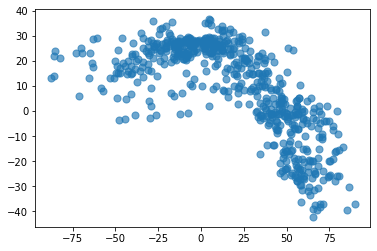

In [67]:
#SCATTER PLOT REAL
    #Temperature vs. Latitude scatterplot
        #x-axis Latitude
        #y-axis Temperature
        #To make a neat x axis labels

xlat = np.arange(-90, 90+1, 10)
plt.scatter(coordsunique["Latitude"], coordsunique["Temperature"], s=50, alpha=0.65)

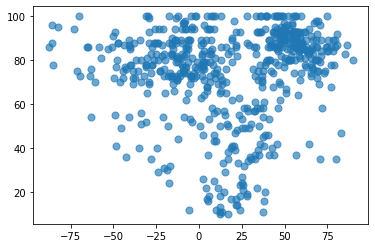

In [68]:
#SCATTER PLOT REAL
    #Humidity vs. Latitude scatterplot
        #x-axis Latitude
        #y-axis Temperature
        #To make a neat x axis labels

xlat = np.arange(-90, 90+1, 10)
plt.scatter(coordsunique["Latitude"], coordsunique["Humidity"], s=50, alpha=0.65)

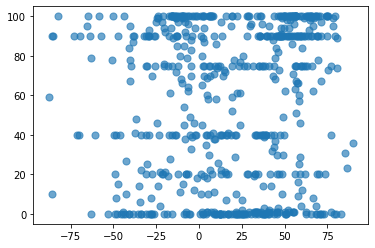

In [69]:
#SCATTER PLOT REAL
    #Cloudiness vs. Latitude scatterplot
        #x-axis Latitude
        #y-axis Temperature
        #To make a neat x axis labels

xlat = np.arange(-90, 90+1, 10)
plt.scatter(coordsunique["Latitude"], coordsunique["Cloudiness"], s=50, alpha=0.65)

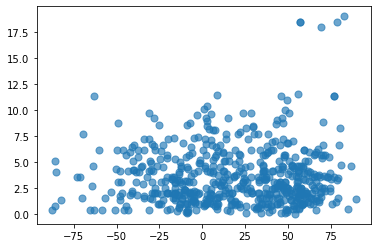

In [70]:
#SCATTER PLOT REAL
    #Wind Speed vs. Latitude scatterplot
        #x-axis Latitude
        #y-axis Temperature
        #To make a neat x axis labels

xlat = np.arange(-90, 90+1, 10)
plt.scatter(coordsunique["Latitude"], coordsunique["Wind Speed"], s=50, alpha=0.65)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [88]:
#df.to_csv('file_name.csv')
#If you want to export without the index, simply add index=False;
#df.to_csv('file_name.csv', index=False)

#df.to_csv (r'C:\Users\Ron\Desktop\export_dataframe.csv', index = False, header=True)

#print (df)


coordsunique.to_csv("CitiesWeather.csv", index=False)
coordsunique


,Latitude,Longitude,City,Country,Date,Temperature,Humidity,Cloudiness,Wind Speed
0,23.65,-27.07,ponta do sol,PT,2021-01-13 10:32:01,11.20,63.0,75.0,3.09
1,32.64,-56.34,saint george,US,2021-01-13 10:28:20,0.00,37.0,1.0,0.72
2,85.35,155.08,chokurdakh,RU,2021-01-13 10:31:44,-39.34,83.0,31.0,0.52
3,-29.18,60.31,saint-philippe,RE,2021-01-13 10:31:47,28.20,70.0,90.0,3.09
4,33.34,-172.68,kapaa,US,2021-01-13 10:31:48,22.00,83.0,1.0,3.09
...,...,...,...,...,...,...,...,...,...
580,-12.91,-33.13,coruripe,BR,2021-01-13 10:38:47,26.92,71.0,100.0,5.02
581,-40.89,167.50,hokitika,NZ,2021-01-13 10:38:47,14.66,89.0,84.0,2.26
582,-21.54,-95.56,hualmay,PE,2021-01-13 10:38:48,20.97,87.0,97.0,3.22
583,-30.89,-72.74,ovalle,CL,2021-01-13 10:38:49,16.48,52.0,0.0,0.37


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [72]:
#  Get the indices of cities that have humidity over 100%.


In [73]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

## Latitude vs. Humidity Plot

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

In [74]:
#create 2 data frames with lat <0 and lat >0

citynorth = coordsunique.loc[coordsunique["Latitude"] > 0, :]
citynorth

,Latitude,Longitude,City,Country,Date,Temperature,Humidity,Cloudiness,Wind Speed
0,23.65,-27.07,ponta do sol,PT,2021-01-13 10:32:01,11.20,63.0,75.0,3.09
1,32.64,-56.34,saint george,US,2021-01-13 10:28:20,0.00,37.0,1.0,0.72
2,85.35,155.08,chokurdakh,RU,2021-01-13 10:31:44,-39.34,83.0,31.0,0.52
4,33.34,-172.68,kapaa,US,2021-01-13 10:31:48,22.00,83.0,1.0,3.09
5,63.24,-143.89,fairbanks,US,2021-01-13 10:30:03,-19.37,84.0,75.0,1.03
...,...,...,...,...,...,...,...,...,...
572,36.98,4.41,timizart,DZ,2021-01-13 10:38:41,10.45,70.0,96.0,3.27
573,46.46,117.75,manzhouli,CN,2021-01-13 10:38:42,-24.62,84.0,3.0,4.32
576,30.23,116.01,huangmei,CN,2021-01-13 10:38:43,9.45,51.0,0.0,0.74
577,47.69,133.67,lermontovka,RU,2021-01-13 10:38:45,-12.83,95.0,100.0,1.39


In [75]:
#create 2 data frames with lat <0 and lat >0

citysouth = coordsunique.loc[coordsunique["Latitude"] < 0, :]
citysouth

,Latitude,Longitude,City,Country,Date,Temperature,Humidity,Cloudiness,Wind Speed
3,-29.18,60.31,saint-philippe,RE,2021-01-13 10:31:47,28.20,70.0,90.0,3.09
9,-43.45,-53.41,mar del plata,AR,2021-01-13 10:30:45,14.68,77.0,0.0,4.12
14,-33.99,-122.31,rikitea,PF,2021-01-13 10:31:54,25.19,80.0,0.0,7.26
15,-44.33,115.95,albany,US,2021-01-13 10:30:02,-3.12,75.0,0.0,0.77
16,-39.54,-163.40,avarua,CK,2021-01-13 10:31:55,27.00,78.0,75.0,6.69
...,...,...,...,...,...,...,...,...,...
580,-12.91,-33.13,coruripe,BR,2021-01-13 10:38:47,26.92,71.0,100.0,5.02
581,-40.89,167.50,hokitika,NZ,2021-01-13 10:38:47,14.66,89.0,84.0,2.26
582,-21.54,-95.56,hualmay,PE,2021-01-13 10:38:48,20.97,87.0,97.0,3.22
583,-30.89,-72.74,ovalle,CL,2021-01-13 10:38:49,16.48,52.0,0.0,0.37


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

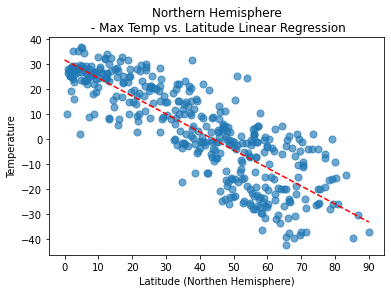

In [76]:
#Scatterplot with linear regression model


northtemp_slope, northtemp_int, northtemp_r, northtemp_p, northtemp_std_err = st.linregress(citynorth["Latitude"], citynorth["Temperature"])

    # Create equation of line to

        #example - vc_fit = vc_slope * year + vc_int
    
xlatnorth = np.arange(0, 90+1, 10)
northtemp_fit = northtemp_slope * xlatnorth + northtemp_int


plt.scatter(citynorth["Latitude"], citynorth["Temperature"], s=50, alpha=0.65)

    #example - plt.plot(year,vc_fit,"--")
plt.plot(xlatnorth, northtemp_fit, "r--")

plt.xticks(xlatnorth)
#plt.figure(figsize=(100, 10))
plt.title('Northern Hemisphere\n - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude (Northen Hemisphere)')
plt.ylabel('Temperature')
plt.show()


In [77]:
northtemp_fit

array([ 31.54156368,  24.35478047,  17.16799727,   9.98121406,
         2.79443086,  -4.39235235, -11.57913555, -18.76591876,
       -25.95270197, -33.13948517])

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

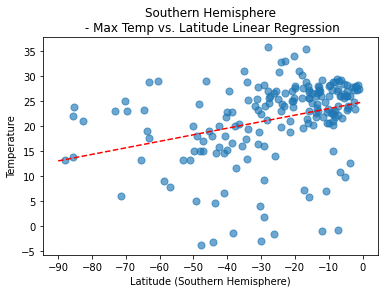

In [78]:
#Scatterplot with linear regression model


southtemp_slope, southtemp_int, southtemp_r, southtemp_p, southtemp_std_err = st.linregress(citysouth["Latitude"], citysouth["Temperature"])

    # Create equation of line to

        #example - vc_fit = vc_slope * year + vc_int
    
xlatsouth = np.arange(-90, 0+1, 10)
southtemp_fit = southtemp_slope * xlatsouth + southtemp_int


plt.scatter(citysouth["Latitude"], citysouth["Temperature"], s=50, alpha=0.65)

    #example - plt.plot(year,vc_fit,"--")
plt.plot(xlatsouth, southtemp_fit, "r--")

plt.xticks(xlatsouth)
#plt.figure(figsize=(100, 10))
plt.title('Southern Hemisphere\n - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude (Southern Hemisphere)')
plt.ylabel('Temperature')
plt.show()

In [79]:
xlatsouth

array([-90, -80, -70, -60, -50, -40, -30, -20, -10,   0])

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

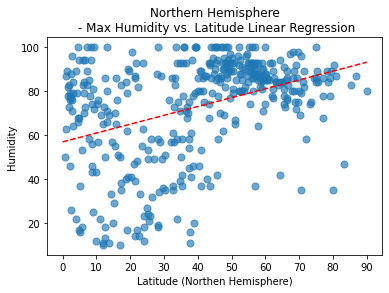

In [80]:
#Scatterplot with linear regression model


northhum_slope, northhum_int, northhum_r, northhum_p, northhum_std_err = st.linregress(citynorth["Latitude"], citynorth["Humidity"])

    # Create equation of line to

        #example - vc_fit = vc_slope * year + vc_int
    
northhum_fit = northhum_slope * xlatnorth + northhum_int

xlatnorth = np.arange(0, 90+1, 10)
plt.scatter(citynorth["Latitude"], citynorth["Humidity"], s=50, alpha=0.65)

    #example - plt.plot(year,vc_fit,"--")
plt.plot(xlatnorth, northhum_fit, "r--")

plt.xticks(xlatnorth)
#plt.figure(figsize=(100, 10))
plt.title('Northern Hemisphere\n - Max Humidity vs. Latitude Linear Regression')
plt.xlabel('Latitude (Northen Hemisphere)')
plt.ylabel('Humidity')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

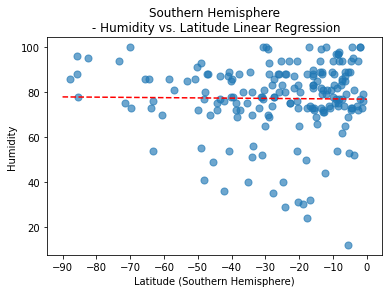

In [81]:
#Scatterplot with linear regression model


southhum_slope, southhum_int, southhum_r, southhum_p, southhum_std_err = st.linregress(citysouth["Latitude"], citysouth["Humidity"])

    # Create equation of line to

        #example - vc_fit = vc_slope * year + vc_int
    
xlatsouth = np.arange(-90, 0+1, 10)
southhum_fit = southhum_slope * xlatsouth + southhum_int


plt.scatter(citysouth["Latitude"], citysouth["Humidity"], s=50, alpha=0.65)

    #example - plt.plot(year,vc_fit,"--")
plt.plot(xlatsouth, southhum_fit, "r--")

plt.xticks(xlatsouth)
#plt.figure(figsize=(100, 10))
plt.title('Southern Hemisphere\n - Humidity vs. Latitude Linear Regression')
plt.xlabel('Latitude (Southern Hemisphere)')
plt.ylabel('Humidity')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

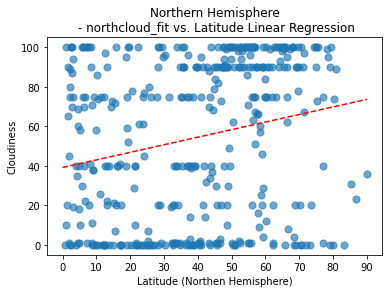

In [82]:
#Scatterplot with linear regression model


northcloud_slope, northcloud_int, northcloud_r, northcloud_p, northcloud_std_err = st.linregress(citynorth["Latitude"], citynorth["Cloudiness"])

    # Create equation of line to

        #example - vc_fit = vc_slope * year + vc_int
    
xlatnorth = np.arange(0, 90+1, 10)
northcloud_fit = northcloud_slope * xlatnorth + northcloud_int

plt.scatter(citynorth["Latitude"], citynorth["Cloudiness"], s=50, alpha=0.65)

    #example - plt.plot(year,vc_fit,"--")
plt.plot(xlatnorth, northcloud_fit, "r--")

plt.xticks(xlatnorth)
#plt.figure(figsize=(100, 10))
plt.title('Northern Hemisphere\n - northcloud_fit vs. Latitude Linear Regression')
plt.xlabel('Latitude (Northen Hemisphere)')
plt.ylabel('Cloudiness')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

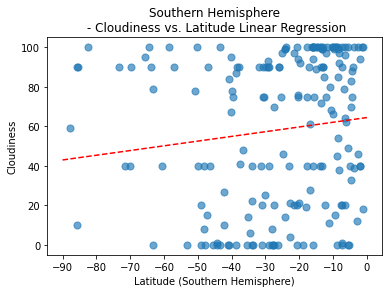

In [83]:
#Scatterplot with linear regression model

southcloud_slope, southcloud_int, southcloud_r, southcloud_p, southcloud_std_err = st.linregress(citysouth["Latitude"], citysouth["Cloudiness"])

    # Create equation of line to

        #example - vc_fit = vc_slope * year + vc_int
    
xlatsouth = np.arange(-90, 0+1, 10)
southcloud_fit = southcloud_slope * xlatsouth + southcloud_int


plt.scatter(citysouth["Latitude"], citysouth["Cloudiness"], s=50, alpha=0.65)

    #example - plt.plot(year,vc_fit,"--")
plt.plot(xlatsouth, southcloud_fit, "r--")

plt.xticks(xlatsouth)
#plt.figure(figsize=(100, 10))
plt.title('Southern Hemisphere\n - Cloudiness vs. Latitude Linear Regression')
plt.xlabel('Latitude (Southern Hemisphere)')
plt.ylabel('Cloudiness')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

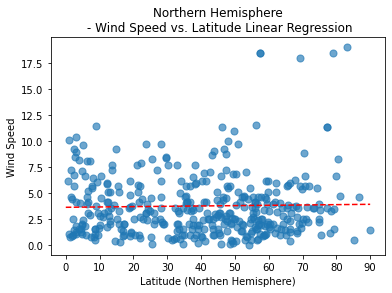

In [84]:
#Scatterplot with linear regression model


northwind_slope, northwind_int, northwind_r, northwind_p, northwind_std_err = st.linregress(citynorth["Latitude"], citynorth["Wind Speed"])

    # Create equation of line to

        #example - vc_fit = vc_slope * year + vc_int
    
xlatnorth = np.arange(0, 90+1, 10)
northwind_fit = northwind_slope * xlatnorth + northwind_int


plt.scatter(citynorth["Latitude"], citynorth["Wind Speed"], s=50, alpha=0.65)

    #example - plt.plot(year,vc_fit,"--")
plt.plot(xlatnorth, northwind_fit, "r--")

plt.xticks(xlatnorth)
#plt.figure(figsize=(100, 10))
plt.title('Northern Hemisphere\n - Wind Speed vs. Latitude Linear Regression')
plt.xlabel('Latitude (Northen Hemisphere)')
plt.ylabel('Wind Speed')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

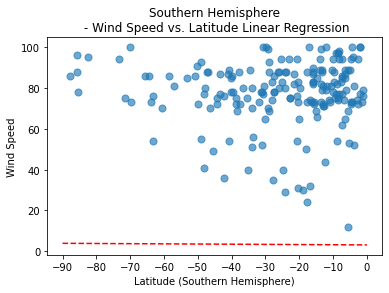

In [85]:
#Scatterplot with linear regression model


southwind_slope, southwind_int, southwind_r, southwind_p, southwind_std_err = st.linregress(citysouth["Latitude"], citysouth["Wind Speed"])

    # Create equation of line to

        #example - vc_fit = vc_slope * year + vc_int
    
xlatsouth = np.arange(-90, 0+1, 10)
southwind_fit = southwind_slope * xlatsouth + southwind_int


plt.scatter(citysouth["Latitude"], citysouth["Humidity"], s=50, alpha=0.65)

    #example - plt.plot(year,vc_fit,"--")
plt.plot(xlatsouth, southwind_fit, "r--")

plt.xticks(xlatsouth)
#plt.figure(figsize=(100, 10))
plt.title('Southern Hemisphere\n - Wind Speed vs. Latitude Linear Regression')
plt.xlabel('Latitude (Southern Hemisphere)')
plt.ylabel('Wind Speed')
plt.show()